# Deliverable 3

## Optimization Attempt 1

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

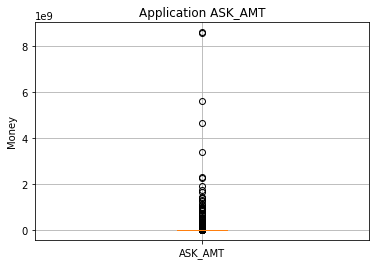

In [3]:
# Create a box-and-whisker plot for the ASK_AMT to check amount of outliers
x_labels = ["ASK_AMT"]
fig, ax = plt.subplots()
ax.boxplot(application_df['ASK_AMT'], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Application ASK_AMT')
ax.set_ylabel('Money')
ax.grid()
plt.show()

In [4]:
# Drop the noisy variable ASK_AMT
application_df = application_df.drop(columns=['ASK_AMT'], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [6]:
# Look at APPLICATION_TYPE value counts for binning
apptype_counts = application_df.APPLICATION_TYPE.value_counts()
apptype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptype_counts[apptype_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C5200        1
C2600        1
C1236        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 43 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:48 - loss: 0.6888 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6807 - accuracy: 0.5455  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.6477 - accuracy: 0.6285
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6305 - accuracy: 0.6578
Epoch 000


Epoch 00001: saving model to checkpoints\weights.01.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5822 - accuracy: 0.7108
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5807 - accuracy: 0.7120
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5795 - accuracy: 0.7125
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01

257/804 [========>.....................] - ETA: 1s - loss: 0.5587 - accuracy: 0.7304
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5596 - accuracy: 0.7298
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5587 - accuracy: 0.7309
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
321/804 [==========>...................] - ETA: 1s -


Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5503 - accuracy: 0.7329
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5513 - accuracy: 0.7323
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5512 - accuracy: 0.7318
Epoch 00003: saving model to checkpoints\weights.03


Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7319
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7318
Epoch 5/100
  1/804 [..............................] - ETA: 0s - loss: 0.5726 - accuracy: 0.7188
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7230
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00

229/804 [=======>......................] - ETA: 1s - loss: 0.5499 - accuracy: 0.7265
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5483 - accuracy: 0.7280
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5480 - accuracy: 0.7281
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5469 - accuracy: 0.7331
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5467 - accuracy: 0.7335
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7326
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07

203/804 [======>.......................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7281
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.5510 - accuracy: 0.7275
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.5507 - accuracy: 0.7298
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08

743/804 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7343
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7348
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7340
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 2s 2ms/st

182/804 [=====>........................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7406
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7399
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7337
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10

725/804 [==========================>...] - ETA: 0s - loss: 0.5446 - accuracy: 0.7356
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5445 - accuracy: 0.7357
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5444 - accuracy: 0.7361
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10

182/804 [=====>........................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7359
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7340
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7340
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12


Epoch 00012: saving model to checkpoints\weights.12.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7351
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7352
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5443 - accuracy: 0.7353
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.5408 - accuracy: 0.7405
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5424 - accuracy: 0.7386
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5427 - accuracy: 0.7383
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13

176/804 [=====>........................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7331
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7323
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5457 - accuracy: 0.7306
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14

709/804 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7374
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5438 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7363
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14


Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7392
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.5427 - accuracy: 0.7374
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7358
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16

415/804 [==============>...............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7408
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5361 - accuracy: 0.7421
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5371 - accuracy: 0.7417
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17


Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7386
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5417 - accuracy: 0.7368
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18


Epoch 00020: saving model to checkpoints\weights.20.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7361
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7367
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7400
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7404
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5399 - accuracy: 0.7394
Epoch 00020: saving model to checkpoints\weights.20

401/804 [=============>................] - ETA: 0s - loss: 0.5458 - accuracy: 0.7353
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5463 - accuracy: 0.7345
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5451 - accuracy: 0.7356
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5469 - accuracy: 0.7345
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7359
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7357
Epoch 00022: saving model to checkpoints\weights.22

378/804 [=============>................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7424
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5382 - accuracy: 0.7414
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5376 - accuracy: 0.7417
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23


Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 0.5499 - accuracy: 0.7303
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7312
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7355
Epoch 00024: saving model to checkpoints\weights.24


Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7379
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5416 - accuracy: 0.7378
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7386
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.5398 - accuracy: 0.7382
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
415/804 [==============>...............] - ETA: 0s - loss: 0.5409 - accuracy: 0.7370
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25


Epoch 00026: saving model to checkpoints\weights.26.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7326
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7328
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7340
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26

631/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7377
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7379
Epoch 00026: saving model to checkpoints\weights.26.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7377
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7377
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model

352/804 [============>.................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7398
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7391
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7398
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27


Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7392
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7447
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7414
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28


Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7380
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7377
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7383
Epoch 00028: saving model to checkpoints\weights.28


Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7415
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7349
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7296
Epoch 00030: saving model to checkpoints\weights.30


Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7342
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7349
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7351
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31

 46/804 [>.............................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7486
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 67/804 [=>............................] - ETA: 1s - loss: 0.5199 - accuracy: 0.7528
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 0.5295 - accuracy: 0.7482
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32


Epoch 00032: saving model to checkpoints\weights.32.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7402
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7403
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7396
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32


Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7392
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7378
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7395
Epoch 00033: saving model to checkpoints\weights.33

569/804 [====================>.........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7432
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7428
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7437
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34


Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7444
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7446
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7456
Epoch 00035: saving model to checkpoints\weights.35


Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7296
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7310
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7317
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36

551/804 [===================>..........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7436
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7430
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7420
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36


Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7437
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7448
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7453
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37


Epoch 00038: saving model to checkpoints\weights.38.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7486
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7391
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7370
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38


Epoch 00039: saving model to checkpoints\weights.39.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7387
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7401
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7405
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39

Epoch 40/100
  1/804 [..............................] - ETA: 1s - loss: 0.4059 - accuracy: 0.8750
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.5226 - accuracy: 0.7541
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 0.5155 - accuracy: 0.7576
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoin

545/804 [===================>..........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7388
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7397
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7394
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40

271/804 [=========>....................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7365
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7383
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7387
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41

Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.5011 - accuracy: 0.8125
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7543
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7357
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoin


Epoch 00042: saving model to checkpoints\weights.42.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7405
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7411
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7408
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42


Epoch 00043: saving model to checkpoints\weights.43.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7388
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7391
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7375
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43


Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7393
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7399
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7389
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44


Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7356
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7365
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7378
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45


Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7392
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7399
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7405
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46


Epoch 00047: saving model to checkpoints\weights.47.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7398
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7399
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7402
Epoch 00047: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 2s 2ms/st


Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7426
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5370 - accuracy: 0.7425
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7421
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48

200/804 [======>.......................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7464
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.5257 - accuracy: 0.7480
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7499
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49


Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5356 - accuracy: 0.7399
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7404
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
503/804 [=================>............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7402
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50


Epoch 00051: saving model to checkpoints\weights.51.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7460
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7440
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7431
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51


Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.5367 - accuracy: 0.7401
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.5360 - accuracy: 0.7408
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5374 - accuracy: 0.7402
Epoch 00052: saving model to checkpoints\weights.52


Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7403
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7399
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7398
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53


Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5230 - accuracy: 0.7504
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7460
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7456
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55


Epoch 00055: saving model to checkpoints\weights.55.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7403
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7405
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7405
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55


Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7427
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7414
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7419
Epoch 00057: saving model to checkpoints\weights.57


Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7397
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7398
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7398
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57


Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7402
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7411
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7404
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58


Epoch 00059: saving model to checkpoints\weights.59.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7401
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7407
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7413
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59


Epoch 00060: saving model to checkpoints\weights.60.hdf5
395/804 [=============>................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7413
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5359 - accuracy: 0.7422
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7428
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60

651/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7411
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7401
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7401
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61


Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
392/804 [=============>................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7415
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7418
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5340 - accuracy: 0.7424
Epoch 00062: saving model to checkpoints\weights.62


Epoch 00063: saving model to checkpoints\weights.63.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5140 - accuracy: 0.7635
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 0.5160 - accuracy: 0.7601
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.5206 - accuracy: 0.7552
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63

374/804 [============>.................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7432
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5321 - accuracy: 0.7451
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7453
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64


Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
123/804 [===>..........................] - ETA: 1s - loss: 0.5150 - accuracy: 0.7589
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.5143 - accuracy: 0.7586
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.5131 - accuracy: 0.7572
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65


Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7400
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7396
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7392
Epoch 00065: saving model to checkpoints\weights.65


Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7403
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.5349 - accuracy: 0.7402
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.5352 - accuracy: 


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7343
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7329
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7366
Epoch 00067: saving model to checkpoints\weights.67


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7430
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7435
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7433
Epoch 00067: saving model to checkpoints\weights.67

398/804 [=============>................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7421
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5340 - accuracy: 0.7419
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5340 - accuracy: 0.7426
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68

122/804 [===>..........................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7462
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7427
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7418
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69


Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7389
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7387
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5391 - accuracy: 0.7392
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70


Epoch 00071: saving model to checkpoints\weights.71.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 0.5224 - accuracy: 0.7439
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 0.5159 - accuracy: 0.7465
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 0.5178 - accuracy: 0.7474
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71


Epoch 00071: saving model to checkpoints\weights.71.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7395
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7399
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7394
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71


Epoch 00072: saving model to checkpoints\weights.72.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7374
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7384
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7385
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72


Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 92/804 [==>...........................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7439
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7423
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7431
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73


Epoch 00074: saving model to checkpoints\weights.74.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7434
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7423
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7414
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74

590/804 [=====================>........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7408
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7411
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7409
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75


Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7413
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7408
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5332 - accuracy: 

 46/804 [>.............................] - ETA: 1s - loss: 0.5231 - accuracy: 0.7466
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 67/804 [=>............................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7388
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 92/804 [==>...........................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7388
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77

582/804 [====================>.........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7425
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7436
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7434
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77


Epoch 00078: saving model to checkpoints\weights.78.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7421
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7406
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7421
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78


Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7443
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7417
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7330
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79


Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7397
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7397
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79

 26/804 [..............................] - ETA: 1s - loss: 0.5276 - accuracy: 0.7560
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.5204 - accuracy: 0.7564
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.5175 - accuracy: 0.7592
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81

287/804 [=========>....................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7435
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7429
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7434
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82


Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7337
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.5226 - accuracy: 0.7480
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.5241 - accuracy: 0.7486
Epoch 00083: saving model to checkpoints\weights.83


Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7383
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7375
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7377
Epoch 00083: saving model to checkpoints\weights.83

283/804 [=========>....................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7414
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7415
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7428
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84


Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5345 - accuracy: 0.7396
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7398
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5351 - accuracy: 0.7397
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85


Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7380
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7368
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7373
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86

804/804 [==============================] - 2s 2ms/step - loss: 0.5351 - accuracy: 0.7402
Epoch 87/100
  1/804 [..............................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8750
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7358
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7357
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 0

522/804 [==================>...........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7408
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5351 - accuracy: 0.7415
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7412
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87

253/804 [========>.....................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7373
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7385
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7388
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88


Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7410
Epoch 89/100
  1/804 [..............................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8750
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.5041 - accuracy: 0.7708
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
 47/804 [>........................


Epoch 00090: saving model to checkpoints\weights.90.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7343
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7352
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7361
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90

496/804 [=================>............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7433
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7431
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7433
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91


Epoch 00092: saving model to checkpoints\weights.92.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7444
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7456
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7451
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92

737/804 [==========================>...] - ETA: 0s - loss: 0.5341 - accuracy: 0.7410
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7414
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7418
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
797/804 [============================>.] - ETA: 0s -

153/804 [====>.........................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7367
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7414
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7417
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94


Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7435
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5297 - accuracy: 0.7440
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7426
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95

625/804 [======================>.......] - ETA: 0s - loss: 0.5348 - accuracy: 0.7397
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5348 - accuracy: 0.7399
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7393
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96


Epoch 00097: saving model to checkpoints\weights.97.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7427
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7435
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7419
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97

 67/804 [=>............................] - ETA: 1s - loss: 0.5242 - accuracy: 0.7509
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.5240 - accuracy: 0.7472
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.5199 - accuracy: 0.7509
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98


Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7434
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5340 - accuracy: 0.7426
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7426
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98

309/804 [==========>...................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7375
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7374
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7385
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99


Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 0.5170 - accuracy: 0.7507
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.5242 - accuracy: 0.7459
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 0.5224


Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7404
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7415
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7422
Epoch 00100: saving model to checkpoint

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 4.1228 - accuracy: 0.6159
Loss: 4.12283182144165, Accuracy: 0.6158600449562073


## Optimization Attempt 2

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', and the noisy variable ASK_AMT
application_df = application_df.drop(columns=['EIN', 'NAME', 'ASK_AMT'], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [3]:
# Look at APPLICATION_TYPE value counts for binning
apptype_counts = application_df.APPLICATION_TYPE.value_counts()
apptype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptype_counts[apptype_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C4120        1
C1900        1
C1580        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [7]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [8]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 43 columns]

In [9]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 9,051
Trainable params: 9,051
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [14]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [15]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:02 - loss: 0.7364 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 11s - loss: 0.7135 - accuracy: 0.4167 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 26/804 [..............................] - ETA: 4s - loss: 0.6879 - accuracy: 0.5601 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.6706 - accuracy: 0.6053
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00


Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5807 - accuracy: 0.7116
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5796 - accuracy: 0.7129
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5784 - accuracy: 0.7136
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01


Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5535 - accuracy: 0.7326
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5530 - accuracy: 0.7322
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5542 - accuracy: 0.7300
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02

747/804 [==========================>...] - ETA: 0s - loss: 0.5538 - accuracy: 0.7303
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5543 - accuracy: 0.7300
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7300
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5544 - accuracy: 0.7296
Epoch 3/100
  1/804 [

453/804 [===============>..............] - ETA: 1s - loss: 0.5551 - accuracy: 0.7322
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5554 - accuracy: 0.7320
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5551 - accuracy: 0.7321
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
513/804 [==================>...........] - ETA: 0s -

159/804 [====>.........................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7349
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7387
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7391
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7380
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model


Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5506 - accuracy: 0.7330
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5513 - accuracy: 0.7323
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5515 - accuracy: 0.7323
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04


Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7318
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5522 - accuracy: 0.7321
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5519 - accuracy: 0.7319
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05

 99/804 [==>...........................] - ETA: 1s - loss: 0.5554 - accuracy: 0.7241
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7271
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.5533 - accuracy: 0.7273
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
156/804 [====>.........................] - ETA: 1s -


Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5461 - accuracy: 0.7340
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7338
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5455 - accuracy: 0.7342
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7409
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7394
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7377
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07

 38/804 [>.............................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7303
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7371
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7344
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 98/804 [==>...........................] - ETA: 1s -

558/804 [===================>..........] - ETA: 0s - loss: 0.5477 - accuracy: 0.7330
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5474 - accuracy: 0.7336
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5463 - accuracy: 0.7340
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
618/804 [======================>.......] - ETA: 0s -

264/804 [========>.....................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7340
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7334
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7318
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
324/804 [===========>..................] - ETA: 1s -

784/804 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7348
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5459 - accuracy: 0.7355
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 0.6468 - accuracy: 0.5312
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5123 - accuracy: 0.7531
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 0


Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5475 - accuracy: 0.7351
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7351
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7348
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10

201/804 [======>.......................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7446
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7441
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7427
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
261/804 [========>.....................] - ETA: 1s -


Epoch 00011: saving model to checkpoints\weights.11.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5447 - accuracy: 0.7361
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5446 - accuracy: 0.7360
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5444 - accuracy: 0.7363
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7376
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.5404 - accuracy: 0.7381
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5414 - accuracy: 0.7368
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7409
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7417
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7402
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5429 - accuracy: 0.7372
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7362
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7363
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13


Epoch 00014: saving model to checkpoints\weights.14.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7354
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7336
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7344
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14

 60/804 [=>............................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7469
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7418
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7456
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
120/804 [===>..........................] - ETA: 1s -

580/804 [====================>.........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7381
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5424 - accuracy: 0.7381
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7390
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
640/804 [======================>.......] - ETA: 0s -

796/804 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7372
Epoch 00016: saving model to checkpoints\weights.16.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5424 - accuracy: 0.7373
Epoch 17/100
  1/804 [..............................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7812
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7537
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5071 - accuracy: 0.7703
Epoch 00017: saving model to checkpoint

198/804 [======>.......................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7361
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7377
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7383
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
258/804 [========>.....................] - ETA: 1s -

718/804 [=========================>....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7377
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7378
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5422 - accuracy: 0.7377
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
778/804 [============================>.] - ETA: 0s -


Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7380
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5405 - accuracy: 0.7381
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5410 - accuracy: 0.7377
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7489
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7469
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7462
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5364 - accuracy: 0.7426
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7415
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7410
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20


Epoch 00021: saving model to checkpoints\weights.21.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7365
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7380
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7385
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
416/804 [==============>...............] - ETA: 1s -

577/804 [====================>.........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7378
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7377
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7389
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
637/804 [======================>.......] - ETA: 0s -

798/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7383
Epoch 00023: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5402 - accuracy: 0.7380
Epoch 24/100
  1/804 [..............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5938
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.5517 - accuracy: 0.7336
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 34/804 [>.............................] - ETA: 4s - loss: 0.5511 - accuracy: 0.7279
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7410
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5408 - accuracy: 0.7409
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5421 - accuracy: 0.7396
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7405
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7421
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7404
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25


Epoch 00025: saving model to checkpoints\weights.25.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7378
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7384
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7379
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25


Epoch 00026: saving model to checkpoints\weights.26.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7391
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7397
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5396 - accuracy: 0.7400
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26

137/804 [====>.........................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7459
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7468
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7475
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
197/804 [======>.......................] - ETA: 1s -

657/804 [=======================>......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7391
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7392
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7388
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
717/804 [=========================>....] - ETA: 0s -

 59/804 [=>............................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7394
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7373
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7383
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
119/804 [===>..........................] - ETA: 1s -

280/804 [=========>....................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7394
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7393
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7395
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
340/804 [===========>..................] - ETA: 1s -

800/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7389
Epoch 00030: saving model to checkpoints\weights.30.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5391 - accuracy: 0.7389
Epoch 31/100
  1/804 [..............................] - ETA: 0s - loss: 0.4733 - accuracy: 0.7812
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7411
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7447
Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints\weights.31.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5412 - accuracy: 0.7410
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7401
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7396
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31


Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7326
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7325
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7336
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32


Epoch 00032: saving model to checkpoints\weights.32.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7391
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7393
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7393
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32


Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7343
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7378
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7411
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34


Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7397
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7402
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7407
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34


Epoch 00035: saving model to checkpoints\weights.35.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7378
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7378
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7384
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35

 61/804 [=>............................] - ETA: 2s - loss: 0.5231 - accuracy: 0.7546
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7508
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7429
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
121/804 [===>..........................] - ETA: 2s -

581/804 [====================>.........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7394
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7390
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7392
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
641/804 [======================>.......] - ETA: 0s -


Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7380
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7379
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7379
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37

Epoch 38/100
  1/804 [..............................] - ETA: 0s - loss: 0.4471 - accuracy: 0.8438
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7535
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7500
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 58/804 [=>............................


Epoch 00038: saving model to checkpoints\weights.38.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7392
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7386
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7385
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38

219/804 [=======>......................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7427
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7433
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7448
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
279/804 [=========>....................] - ETA: 1s -

739/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7384
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7390
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
799/804 [============================>.] - ETA: 0s -

141/804 [====>.........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7445
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7434
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7443
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
201/804 [======>.......................] - ETA: 1s -

661/804 [=======================>......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7422
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7427
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7421
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
721/804 [=========================>....] - ETA: 0s -


Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7371
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7380
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7375
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42


Epoch 00043: saving model to checkpoints\weights.43.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7276
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7321
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7338
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43

593/804 [=====================>........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7390
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7382
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7388
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
653/804 [=======================>......] - ETA: 0s -

299/804 [==========>...................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7355
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7361
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7379
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
359/804 [============>.................] - ETA: 1s -

520/804 [==================>...........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7392
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7393
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7405
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
580/804 [====================>.........] - ETA: 0s -


Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7259
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5525 - accuracy: 0.7249
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7270
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46

751/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7401
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7403
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7401
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5370 - accuracy: 0.7402
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.5295 

457/804 [================>.............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7429
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7439
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7436
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
517/804 [==================>...........] - ETA: 0s -

678/804 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7400
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7401
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7401
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
738/804 [==========================>...] - ETA: 0s -


Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7374
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7361
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7360
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49


Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5176 - accuracy: 0.7559
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5241 - accuracy: 0.7500
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7493
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50


Epoch 00050: saving model to checkpoints\weights.50.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7398
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5366 - accuracy: 0.7397
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50


Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7419
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7429
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7429
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51

532/804 [==================>...........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7414
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7420
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7423
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
592/804 [=====================>........] - ETA: 0s -

238/804 [=======>......................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7365
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7334
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7309
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
298/804 [==========>...................] - ETA: 1s -


Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7404
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7408
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5364 - accuracy: 0.7402
Epoch 54/100
  1/804 [..............................] - ETA: 1s - loss: 0.4058 - accuracy: 0.8125
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 0

160/804 [====>.........................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7414
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7401
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7403
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
220/804 [=======>......................] - ETA: 1s -

680/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7393
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7391
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7392
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
740/804 [==========================>...] - ETA: 0s -

 75/804 [=>............................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7362
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7401
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7335
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
132/804 [===>..........................] - ETA: 1s -

288/804 [=========>....................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7388
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7410
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7409
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
348/804 [===========>..................] - ETA: 1s -


Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7404
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5365 - accuracy: 0.7413
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7404
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59

215/804 [=======>......................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7417
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.5295 - accuracy: 0.7426
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7409
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
275/804 [=========>....................] - ETA: 1s -

735/804 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7406
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5353 - accuracy: 0.7403
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5360 - accuracy: 0.7402
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
795/804 [============================>.] - ETA: 0s -


Epoch 00061: saving model to checkpoints\weights.61.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7393
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7408
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5363 - accuracy: 0.7406
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

157/804 [====>.........................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7361
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7373
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7356
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
217/804 [=======>......................] - ETA: 1s -

373/804 [============>.................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7387
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7374
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7388
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
433/804 [===============>..............] - ETA: 1s -

 79/804 [=>............................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7397
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7408
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7384
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
139/804 [====>.........................] - ETA: 1s -

599/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7408
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7416
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7421
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
659/804 [=======================>......] - ETA: 0s -

Epoch 66/100
  1/804 [..............................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8750
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5205 - accuracy: 0.7455
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5209 - accuracy: 0.7546
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 61/804 [=>............................

521/804 [==================>...........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7447
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7443
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7436
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
581/804 [====================>.........] - ETA: 0s -


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7458
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7468
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7471
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7422
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7414
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7412
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5350 - accuracy: 0.7410
Epoch 68/100
  1/804 


Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7394
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7391
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5371 - accuracy: 0.7400
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68

159/804 [====>.........................] - ETA: 1s - loss: 0.5270 - accuracy: 0.7447
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7427
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7440
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
219/804 [=======>......................] - ETA: 1s -

380/804 [=============>................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7416
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7410
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7417
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
440/804 [===============>..............] - ETA: 0s -


Epoch 00071: saving model to checkpoints\weights.71.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7420
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7415
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5354 - accuracy: 0.7421
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71


Epoch 00072: saving model to checkpoints\weights.72.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7456
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7460
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7459
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72

Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5625
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7309
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7368
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 58/804 [=>............................


Epoch 00073: saving model to checkpoints\weights.73.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7404
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7401
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7401
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7393
Epoch 00073: saving model


Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7399
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7394
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7391
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74

734/804 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7403
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5351 - accuracy: 0.7404
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5347 - accuracy: 0.7408
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
794/804 [============================>.] - ETA: 0s -

440/804 [===============>..............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7412
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7420
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5342 - accuracy: 0.7421
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
500/804 [=================>............] - ETA: 0s -

133/804 [===>..........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7439
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7417
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7391
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7381
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model


Epoch 00076: saving model to checkpoints\weights.76.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5336 - accuracy: 0.7421
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7421
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7424
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

357/804 [============>.................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7389
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7390
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7398
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
417/804 [==============>...............] - ETA: 1s -


Epoch 00078: saving model to checkpoints\weights.78.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7395
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5367 - accuracy: 0.7392
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7401
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78


Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7389
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7415
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7402
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79

794/804 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7408
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7408
Epoch 80/100
  1/804 [..............................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7500
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5215 - accuracy: 0.7422
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5289 

510/804 [==================>...........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7434
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7430
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7428
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
570/804 [====================>.........] - ETA: 0s -

721/804 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7419
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5335 - accuracy: 0.7422
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7415
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
781/804 [============================>.] - ETA: 0s -


Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7395
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7408
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7408
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82

138/804 [====>.........................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7348
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7381
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7375
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
198/804 [======>.......................] - ETA: 1s -


Epoch 00084: saving model to checkpoints\weights.84.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7429
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7437
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7430
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

 60/804 [=>............................] - ETA: 2s - loss: 0.5155 - accuracy: 0.7573
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7508
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7441
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
120/804 [===>..........................] - ETA: 1s -


Epoch 00085: saving model to checkpoints\weights.85.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5277 - accuracy: 0.7446
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7442
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7430
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
646/804 [=======================>......] - ETA: 0s -

796/804 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7418
Epoch 00086: saving model to checkpoints\weights.86.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5338 - accuracy: 0.7415
Epoch 87/100
  1/804 [..............................] - ETA: 1s - loss: 0.5239 - accuracy: 0.6875
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7261
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7331
Epoch 00087: saving model to checkpoint


Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7431
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7432
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7438
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
253/804 [========>.....................] - ETA: 1s -

713/804 [=========================>....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7415
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5345 - accuracy: 0.7405
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7412
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
773/804 [===========================>..] - ETA: 0s -

419/804 [==============>...............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7385
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7398
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7409
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
479/804 [================>.............] - ETA: 0s -

628/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7391
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7388
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7386
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7389
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model


Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7433
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7443
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7434
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91


Epoch 00092: saving model to checkpoints\weights.92.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7405
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7406
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7408
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92


Epoch 00093: saving model to checkpoints\weights.93.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7406
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7426
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7415
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93

768/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7415
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7412
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5336 - accuracy: 0.7413
Epoch 94/100
  1/804 [..............................] - ETA: 1s - loss: 0.5911 - accuracy: 0.7188
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 19/804 


Epoch 00094: saving model to checkpoints\weights.94.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7401
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7411
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7421
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94


Epoch 00095: saving model to checkpoints\weights.95.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7439
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7425
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7457
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95


Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7445
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7442
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7432
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

612/804 [=====================>........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7397
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7407
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7412
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
672/804 [========================>.....] - ETA: 0s -

 19/804 [..............................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7385
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7340
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7352
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 79/804 [=>............................] - ETA: 2s -

240/804 [=======>......................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7451
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7454
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7447
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7444
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: s


Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7422
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7420
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7420
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================]

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 10.5922 - accuracy: 0.7057
Loss: 10.592185974121094, Accuracy: 0.7056559920310974


## Optimization Attempt 3

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', and the noisy variable ASK_AMT
application_df = application_df.drop(columns=['EIN', 'NAME', 'ASK_AMT'], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [3]:
# Make series of APPLICATION_TYPE value counts
apptype_counts = application_df.APPLICATION_TYPE.value_counts()

# Determine which values to replace if counts are less than ...?
replace_application = list(apptype_counts[apptype_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Make series of CLASSIFICATION value counts
class_counts = application_df.CLASSIFICATION.value_counts()

# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [6]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 43 columns]

In [7]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 9,051
Trainable params: 9,051
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [12]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [13]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
  1/804 [..............................] - ETA: 4:11 - loss: 1.0291 - accuracy: 0.6250
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.7697 - accuracy: 0.5179  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.7098 - accuracy: 0.5755
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 61/804 [=>.........................


Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5890 - accuracy: 0.7087
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5891 - accuracy: 0.7095
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5878 - accuracy: 0.7112
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01


Epoch 00002: saving model to checkpoints\weights.02.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5597 - accuracy: 0.7345
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.5617 - accuracy: 0.7326
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5619 - accuracy: 0.7323
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5604 - accuracy: 0.7339
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model

742/804 [==========================>...] - ETA: 0s - loss: 0.5620 - accuracy: 0.7304
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5616 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5618 - accuracy: 0.7308
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/st


Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5588 - accuracy: 0.7321
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5595 - accuracy: 0.7310
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5583 - accuracy: 0.7314
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03

149/804 [====>.........................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7330
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7311
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.5528 - accuracy: 0.7326
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
209/804 [======>.......................] - ETA: 1s -

669/804 [=======================>......] - ETA: 0s - loss: 0.5542 - accuracy: 0.7334
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5546 - accuracy: 0.7327
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5536 - accuracy: 0.7332
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
729/804 [==========================>...] - ETA: 0s -

370/804 [============>.................] - ETA: 1s - loss: 0.5547 - accuracy: 0.7287
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5531 - accuracy: 0.7299
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5520 - accuracy: 0.7311
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
430/804 [===============>..............] - ETA: 1s -

 81/804 [==>...........................] - ETA: 2s - loss: 0.5582 - accuracy: 0.7315
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.5605 - accuracy: 0.7314
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.5582 - accuracy: 0.7348
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
141/804 [====>.........................] - ETA: 1s -

601/804 [=====================>........] - ETA: 0s - loss: 0.5491 - accuracy: 0.7361
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5494 - accuracy: 0.7363
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5510 - accuracy: 0.7354
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
661/804 [=======================>......] - ETA: 0s -


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5506 - accuracy: 0.7341
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7348
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7335
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07

 19/804 [..............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7204
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7401
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7328
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7358
Epoch 00008: saving model

533/804 [==================>...........] - ETA: 0s - loss: 0.5497 - accuracy: 0.7345
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5497 - accuracy: 0.7343
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7347
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
593/804 [=====================>........] - ETA: 0s -

239/804 [=======>......................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7365
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7362
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7373
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
299/804 [==========>...................] - ETA: 1s -


Epoch 00009: saving model to checkpoints\weights.09.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5489 - accuracy: 0.7371
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7367
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5492 - accuracy: 0.7368
Epoch 10/200
  1/804 [..............................] - ETA: 0s - loss: 0.6495 - accuracy: 0.5938
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 0


Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5475 - accuracy: 0.7359
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5482 - accuracy: 0.7352
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5469 - accuracy: 0.7365
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7381
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7413
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7412
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5459 - accuracy: 0.7375
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7373
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7370
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5531 - accuracy: 0.7335
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5532 - accuracy: 0.7339
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.5542 - accuracy: 0.7326
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7407
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7441
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7429
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13


Epoch 00013: saving model to checkpoints\weights.13.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5473 - accuracy: 0.7347
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5472 - accuracy: 0.7348
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5452 - accuracy: 0.7360
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13

334/804 [===========>..................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5470 - accuracy: 0.7379
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7370
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
394/804 [=============>................] - ETA: 1s -


Epoch 00015: saving model to checkpoints\weights.15.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7414
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7448
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7426
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15


Epoch 00015: saving model to checkpoints\weights.15.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7370
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5484 - accuracy: 0.7370
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5488 - accuracy: 0.7364
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15


Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7354
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5495 - accuracy: 0.7361
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7382
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16


Epoch 00016: saving model to checkpoints\weights.16.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7373
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7371
Epoch 17/200
  1/804 [..............................] - ETA: 1s - loss: 0.6083 - accuracy: 0.6875
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7555
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 0

482/804 [================>.............] - ETA: 0s - loss: 0.5456 - accuracy: 0.7369
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5453 - accuracy: 0.7365
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.5455 - accuracy: 0.7375
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
542/804 [===================>..........] - ETA: 0s -


Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7402
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7418
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7426
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18


Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7385
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5433 - accuracy: 0.7379
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5435 - accuracy: 0.7378
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18

419/804 [==============>...............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7390
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.5411 - accuracy: 0.7384
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5409 - accuracy: 0.7381
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
479/804 [================>.............] - ETA: 0s -

120/804 [===>..........................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7437
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7449
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7477
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
180/804 [=====>........................] - ETA: 1s -

640/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7411
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7403
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7396
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
700/804 [=========================>....] - ETA: 0s -

341/804 [===========>..................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7367
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7372
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7377
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
401/804 [=============>................] - ETA: 1s -


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7198
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7236
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.5494 - accuracy: 0.7278
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22

562/804 [===================>..........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7399
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7392
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7389
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
622/804 [======================>.......] - ETA: 0s -


Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7409
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7428
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7413
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23


Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7373
Epoch 00023: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5425 - accuracy: 0.7374
Epoch 24/200
  1/804 [..............................] - ETA: 0s - loss: 0.6502 - accuracy: 0.6250
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5814 - accuracy: 0.7155
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 39/804 

494/804 [=================>............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7380
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7389
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7382
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
554/804 [===================>..........] - ETA: 0s -

200/804 [======>.......................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7405
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7393
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7414
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
260/804 [========>.....................] - ETA: 1s -

720/804 [=========================>....] - ETA: 0s - loss: 0.5421 - accuracy: 0.7376
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5418 - accuracy: 0.7382
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7388
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7383
Epoch 00025: saving model

421/804 [==============>...............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7405
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7397
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5393 - accuracy: 0.7395
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5384 - accuracy: 0.7403
Epoch 00026: saving model


Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7395
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7369
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7348
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27

642/804 [======================>.......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7369
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5412 - accuracy: 0.7365
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5412 - accuracy: 0.7366
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
702/804 [=========================>....] - ETA: 0s -


Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7405
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7402
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7399
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28

 59/804 [=>............................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7489
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7480
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.5242 - accuracy: 0.7535
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
119/804 [===>..........................] - ETA: 1s -

574/804 [====================>.........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7357
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7357
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7365
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
634/804 [======================>.......] - ETA: 0s -

280/804 [=========>....................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7377
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7384
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7388
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
340/804 [===========>..................] - ETA: 1s -

795/804 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7390
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5399 - accuracy: 0.7389
Epoch 31/200
  1/804 [..............................] - ETA: 0s - loss: 0.4730 - accuracy: 0.7188
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7470
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5205 

501/804 [=================>............] - ETA: 0s - loss: 0.5428 - accuracy: 0.7369
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5421 - accuracy: 0.7367
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5424 - accuracy: 0.7363
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
561/804 [===================>..........] - ETA: 0s -


Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7296
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7307
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7325
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7339
Epoch 00032: saving model

722/804 [=========================>....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7379
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7380
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7379
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
782/804 [============================>.] - ETA: 0s -


Epoch 00033: saving model to checkpoints\weights.33.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5398 - accuracy: 0.7409
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.5398 - accuracy: 0.7404
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7407
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
493/804 [=================>............] - ETA: 0s -

139/804 [====>.........................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7421
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7408
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7399
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
199/804 [======>.......................] - ETA: 1s -


Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5485 - accuracy: 0.7418
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5492 - accuracy: 0.7414
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5491 - accuracy: 0.7413
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34


Epoch 00035: saving model to checkpoints\weights.35.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7386
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7381
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5427 - accuracy: 0.7375
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35

 81/804 [==>...........................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7350
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7376
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7402
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
141/804 [====>.........................] - ETA: 1s -

601/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7393
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7396
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7397
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
661/804 [=======================>......] - ETA: 0s -

307/804 [==========>...................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7438
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7424
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7421
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
367/804 [============>.................] - ETA: 1s -


Epoch 00038: saving model to checkpoints\weights.38.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4963 - accuracy: 0.7681
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7549
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7365
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38


Epoch 00038: saving model to checkpoints\weights.38.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7406
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7409
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7411
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38

239/804 [=======>......................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7407
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7402
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7389
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
299/804 [==========>...................] - ETA: 1s -


Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5427 - accuracy: 0.7393
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5431 - accuracy: 0.7396
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5426 - accuracy: 0.7398
Epoch 40/200
  1/804 [..............................] - ETA: 1s - loss: 0.4598 - accuracy: 0.8125
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 0


Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7402
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7405
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7405
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40


Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7386
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7407
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7418
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41


Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7376
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7384
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7388
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41

397/804 [=============>................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7443
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7445
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5385 - accuracy: 0.7444
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
457/804 [================>.............] - ETA: 0s -

 98/804 [==>...........................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7487
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7519
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7468
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
158/804 [====>.........................] - ETA: 1s -

618/804 [======================>.......] - ETA: 0s - loss: 0.5442 - accuracy: 0.7391
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5434 - accuracy: 0.7400
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5436 - accuracy: 0.7398
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
678/804 [========================>.....] - ETA: 0s -

319/804 [==========>...................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7449
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7451
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7436
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
379/804 [=============>................] - ETA: 1s -

 20/804 [..............................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7344
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7344
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7349
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 80/804 [=>............................] - ETA: 1s -

540/804 [===================>..........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7359
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5446 - accuracy: 0.7358
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7363
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
600/804 [=====================>........] - ETA: 0s -

241/804 [=======>......................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7396
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7392
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7411
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
301/804 [==========>...................] - ETA: 1s -

761/804 [===========================>..] - ETA: 0s - loss: 0.5433 - accuracy: 0.7406
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7401
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5434 - accuracy: 0.7402
Epoch 47/200
  1/804 [..............................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6562
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 0


Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5509 - accuracy: 0.7383
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5502 - accuracy: 0.7389
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5493 - accuracy: 0.7391
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47


Epoch 00048: saving model to checkpoints\weights.48.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7303
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7347
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7357
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48


Epoch 00048: saving model to checkpoints\weights.48.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5461 - accuracy: 0.7387
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5461 - accuracy: 0.7385
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5457 - accuracy: 0.7385
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48

399/804 [=============>................] - ETA: 1s - loss: 0.5452 - accuracy: 0.7357
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5464 - accuracy: 0.7357
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5459 - accuracy: 0.7356
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5457 - accuracy: 0.7368
Epoch 00049: saving model

100/804 [==>...........................] - ETA: 1s - loss: 0.5603 - accuracy: 0.7359
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7378
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5475 - accuracy: 0.7437
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
160/804 [====>.........................] - ETA: 1s -


Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7385
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5461 - accuracy: 0.7383
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7381
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50

321/804 [==========>...................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7426
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7422
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7424
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
381/804 [=============>................] - ETA: 1s -


Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7340
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5184 - accuracy: 0.7549
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7451
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52


Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5496 - accuracy: 0.7382
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5498 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5497 - accuracy: 0.7376
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52

258/804 [========>.....................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7448
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7448
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7429
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
318/804 [==========>...................] - ETA: 1s -

778/804 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.7403
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7405
Epoch 00053: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7404
Epoch 54/200
  1/804 [..............................] - ETA: 1s - loss: 0.5706 - accuracy: 0.6875
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5057 - accuracy: 0.7549
Epoch 00054: saving model to checkpoint


Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7419
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7417
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7424
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54


Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7364
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7366
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7389
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55


Epoch 00055: saving model to checkpoints\weights.55.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5397 - accuracy: 0.7409
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5389 - accuracy: 0.7414
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7413
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55


Epoch 00056: saving model to checkpoints\weights.56.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7401
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7410
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7418
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56

117/804 [===>..........................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7457
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7438
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7470
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
177/804 [=====>........................] - ETA: 1s -

632/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7415
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7410
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7409
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
692/804 [========================>.....] - ETA: 0s -

338/804 [===========>..................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7434
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7434
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7421
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
398/804 [=============>................] - ETA: 1s -

 39/804 [>.............................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7428
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5235 - accuracy: 0.7422
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7341
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7330
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model


Epoch 00059: saving model to checkpoints\weights.59.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7388
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7382
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7389
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59

255/804 [========>.....................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7393
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7419
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7415
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
315/804 [==========>...................] - ETA: 1s -

775/804 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7403
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7404
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5390 - accuracy: 0.7403
Epoch 61/200
  1/804 [..............................] - ETA: 0s - loss: 0.4595 - accuracy: 0.8125
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5021 

481/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7452
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5364 - accuracy: 0.7452
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7457
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
541/804 [===================>..........] - ETA: 0s -


Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7372
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7386
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7396
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62


Epoch 00062: saving model to checkpoints\weights.62.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7400
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7395
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7407
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62

418/804 [==============>...............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7357
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5421 - accuracy: 0.7349
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7370
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
478/804 [================>.............] - ETA: 0s -

119/804 [===>..........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7476
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7502
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7488
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
179/804 [=====>........................] - ETA: 1s -

634/804 [======================>.......] - ETA: 0s - loss: 0.5394 - accuracy: 0.7410
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7408
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7413
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
694/804 [========================>.....] - ETA: 0s -


Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7420
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7405
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7412
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65

 41/804 [>.............................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7470
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7428
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7473
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
101/804 [==>...........................] - ETA: 1s -

561/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7418
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7420
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7415
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
621/804 [======================>.......] - ETA: 0s -


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7401
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7380
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7379
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7402
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5376 - accuracy: 0.7406
Epoch 68/200
  1/804 [..............................] - ETA: 1s - loss: 0.4616 - accuracy: 0.7500
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7431
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 38/804 

498/804 [=================>............] - ETA: 0s - loss: 0.5412 - accuracy: 0.7401
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7390
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7387
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
558/804 [===================>..........] - ETA: 0s -


Epoch 00069: saving model to checkpoints\weights.69.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7401
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7411
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7412
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69

724/804 [==========================>...] - ETA: 0s - loss: 0.5408 - accuracy: 0.7404
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5413 - accuracy: 0.7399
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5412 - accuracy: 0.7396
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
784/804 [============================>.] - ETA: 0s -


Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5440 - accuracy: 0.7399
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5445 - accuracy: 0.7391
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5433 - accuracy: 0.7392
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70


Epoch 00071: saving model to checkpoints\weights.71.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7349
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7366
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7372
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71

656/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7426
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7424
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7426
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
716/804 [=========================>....] - ETA: 0s -


Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7388
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7383
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7361
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72


Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7444
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7417
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7391
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

588/804 [====================>.........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7394
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7393
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7393
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
648/804 [=======================>......] - ETA: 0s -

289/804 [=========>....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7435
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7441
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7436
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
349/804 [============>.................] - ETA: 1s -

804/804 [==============================] - 2s 3ms/step - loss: 0.5375 - accuracy: 0.7413
Epoch 75/200
  1/804 [..............................] - ETA: 0s - loss: 0.5680 - accuracy: 0.8438
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7453
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7404
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 55/804 


Epoch 00075: saving model to checkpoints\weights.75.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7410
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7403
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
570/804 [====================>.........] - ETA: 0s -


Epoch 00076: saving model to checkpoints\weights.76.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7459
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7452
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7437
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

735/804 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7425
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5374 - accuracy: 0.7418
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7418
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
791/804 [============================>.] - ETA: 0s -

437/804 [===============>..............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7460
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5356 - accuracy: 0.7449
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7456
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
497/804 [=================>............] - ETA: 0s -

138/804 [====>.........................] - ETA: 1s - loss: 0.5229 - accuracy: 0.7514
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7460
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7421
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
198/804 [======>.......................] - ETA: 1s -

658/804 [=======================>......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7430
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7427
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7431
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
718/804 [=========================>....] - ETA: 0s -

359/804 [============>.................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7322
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7330
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7343
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
419/804 [==============>...............] - ETA: 1s -

 60/804 [=>............................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7521
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7484
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7484
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
120/804 [===>..........................] - ETA: 1s -

580/804 [====================>.........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7412
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7424
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7422
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
640/804 [======================>.......] - ETA: 0s -


Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7390
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7416
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7412
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81

Epoch 82/200
  1/804 [..............................] - ETA: 0s - loss: 0.6133 - accuracy: 0.6250
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7253
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5130 - accuracy: 0.7542
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 57/804 [=>............................

517/804 [==================>...........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7400
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7406
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7401
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
577/804 [====================>.........] - ETA: 0s -


Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7391
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7381
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7358
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83

743/804 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7407
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7412
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7411
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
804/804 [==============================] - 2s 3ms/st


Epoch 00084: saving model to checkpoints\weights.84.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5377 - accuracy: 0.7452
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7454
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5378 - accuracy: 0.7451
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

160/804 [====>.........................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7418
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7413
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7417
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
220/804 [=======>......................] - ETA: 1s -

680/804 [========================>.....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7416
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7420
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5421 - accuracy: 0.7420
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
740/804 [==========================>...] - ETA: 0s -


Epoch 00086: saving model to checkpoints\weights.86.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5269 - accuracy: 0.7477
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5289 - accuracy: 0.7463
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7456
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86


Epoch 00087: saving model to checkpoints\weights.87.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.5201 - accuracy: 0.7593
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7524
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7507
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87

612/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7421
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5355 - accuracy: 0.7427
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7408
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
672/804 [========================>.....] - ETA: 0s -


Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7369
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7382
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7381
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88

 20/804 [..............................] - ETA: 2s - loss: 0.5743 - accuracy: 0.7016
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7228
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5507 - accuracy: 0.7315
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
 79/804 [=>............................] - ETA: 1s -

539/804 [===================>..........] - ETA: 0s - loss: 0.5456 - accuracy: 0.7388
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7392
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5438 - accuracy: 0.7399
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
599/804 [=====================>........] - ETA: 0s -

240/804 [=======>......................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7427
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7413
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7415
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
300/804 [==========>...................] - ETA: 1s -

755/804 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7429
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7426
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7419
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5364 - accuracy: 0.7418
Epoch 91/200
  1/804 [..............................] - ETA: 1s - loss: 0.4526 

466/804 [================>.............] - ETA: 0s - loss: 0.5392 - accuracy: 0.7403
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.5393 - accuracy: 0.7405
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5386 - accuracy: 0.7414
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
526/804 [==================>...........] - ETA: 0s -


Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7438
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7451
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7437
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92


Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7412
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7409
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5389 - accuracy: 0.7411
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92


Epoch 00093: saving model to checkpoints\weights.93.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5745 - accuracy: 0.7443
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5765 - accuracy: 0.7439
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5733 - accuracy: 0.7447
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93

 99/804 [==>...........................] - ETA: 1s - loss: 0.6302 - accuracy: 0.7348
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6270 - accuracy: 0.7350
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6204 - accuracy: 0.7374
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
159/804 [====>.........................] - ETA: 1s -

619/804 [======================>.......] - ETA: 0s - loss: 0.5980 - accuracy: 0.7404
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5969 - accuracy: 0.7401
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5941 - accuracy: 0.7408
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
679/804 [========================>.....] - ETA: 0s -

320/804 [==========>...................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7391
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7391
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7395
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
380/804 [=============>................] - ETA: 1s -

 21/804 [..............................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7307
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7271
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7341
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 81/804 [==>...........................] - ETA: 1s -


Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7427
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7429
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7441
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96


Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7397
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7406
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7414
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97


Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7414
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7411
Epoch 00097: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5384 - accuracy: 0.7411
Epoch 98/200
  1/804 [..............................] - ETA: 1s - loss: 0.4015 - accuracy: 0.8125
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 19/804 


Epoch 00098: saving model to checkpoints\weights.98.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5387 - accuracy: 0.7434
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5393 - accuracy: 0.7432
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7434
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98

179/804 [=====>........................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7264
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7279
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7319
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
239/804 [=======>......................] - ETA: 1s -

699/804 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7387
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7393
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7401
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7404
Epoch 00099: saving model

400/804 [=============>................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7441
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7447
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5337 - accuracy: 0.7440
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
460/804 [================>.............]


Epoch 00101: saving model to checkpoints\weights.101.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7380
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7415
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7429
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5
161/804 [=====>........................]

626/804 [======================>.......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7406
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7409
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7414
Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoints\weights.101.hdf5

Epoch 00101: saving model to checkpoint

332/804 [===========>..................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7455
Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5254 - accuracy: 0.7464
Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7456
Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5

Epoch 00102: saving model to checkpoints\weights.102.hdf5
394/804 [=============>................]

 43/804 [>.............................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7333
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5
 66/804 [=>............................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7330
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5
 86/804 [==>...........................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7366
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5
107/804 [==>...........................]

557/804 [===================>..........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7412
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5351 - accuracy: 0.7418
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7415
Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoints\weights.103.hdf5

Epoch 00103: saving model to checkpoint


Epoch 00104: saving model to checkpoints\weights.104.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7415
Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7400
Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7403
Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoint


Epoch 00104: saving model to checkpoints\weights.104.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7395
Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5

Epoch 00104: saving model to checkpoints\weights.104.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5363 - accuracy: 0.7395
Epoch 105/200
  1/804 [..............................] - ETA: 1s - loss: 0.3785 - accuracy: 0.8750
Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5196 - accuracy: 0.7485
Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.h


Epoch 00105: saving model to checkpoints\weights.105.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7389
Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7383
Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7390
Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5

Epoch 00105: saving model to checkpoints\weights.105.hdf5
545/804 [===================>..........]


Epoch 00106: saving model to checkpoints\weights.106.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7379
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7371
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7362
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoint

712/804 [=========================>....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7418
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7417
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7416
Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5

Epoch 00106: saving model to checkpoints\weights.106.hdf5
771/804 [===========================>..]

421/804 [==============>...............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7427
Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5311 - accuracy: 0.7432
Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.5320 - accuracy: 0.7430
Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoints\weights.107.hdf5

Epoch 00107: saving model to checkpoint


Epoch 00108: saving model to checkpoints\weights.108.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 0.5236 - accuracy: 0.7558
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.5221 - accuracy: 0.7557
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.5263 - accuracy: 0.7507
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoint


Epoch 00108: saving model to checkpoints\weights.108.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7418
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7415
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7406
Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoints\weights.108.hdf5

Epoch 00108: saving model to checkpoint

344/804 [===========>..................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7465
Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7451
Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7448
Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoints\weights.109.hdf5

Epoch 00109: saving model to checkpoint


Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7442
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
 85/804 [==>...........................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7441
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7418
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoint


Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7415
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7413
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7415
Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoints\weights.110.hdf5

Epoch 00110: saving model to checkpoint

286/804 [=========>....................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7380
Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7386
Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7379
Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoints\weights.111.hdf5

Epoch 00111: saving model to checkpoint

Epoch 112/200
  1/804 [..............................] - ETA: 0s - loss: 0.5559 - accuracy: 0.7188
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7486
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7470
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model


Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7435
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7439
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7433
Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoints\weights.112.hdf5

Epoch 00112: saving model to checkpoint

218/804 [=======>......................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7471
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7444
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7435
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoint

735/804 [==========================>...] - ETA: 0s - loss: 0.5365 - accuracy: 0.7402
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7403
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7407
Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5

Epoch 00113: saving model to checkpoints\weights.113.hdf5
795/804 [============================>.]

425/804 [==============>...............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7416
Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7405
Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7406
Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoints\weights.114.hdf5

Epoch 00114: saving model to checkpoint

125/804 [===>..........................] - ETA: 1s - loss: 0.5260 - accuracy: 0.7517
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7511
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.5231 - accuracy: 0.7500
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoint

647/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7401
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7391
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7390
Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5

Epoch 00115: saving model to checkpoints\weights.115.hdf5
708/804 [=========================>....]


Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7440
Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7424
Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7433
Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoints\weights.116.hdf5

Epoch 00116: saving model to checkpoint

 63/804 [=>............................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7431
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7383
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5
102/804 [==>...........................] - ETA: 1s - loss: 0.5436 - accuracy: 0.7390
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5
123/804 [===>..........................]

580/804 [====================>.........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7400
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7403
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7412
Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoints\weights.117.hdf5

Epoch 00117: saving model to checkpoint


Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5452 - accuracy: 0.7407
Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7430
Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoints\weights.118.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7435
Epoch 00118: saving model to checkpoints\weights.118.hdf5

Epoch 00118: saving model to checkpoint

804/804 [==============================] - 2s 3ms/step - loss: 0.5462 - accuracy: 0.7404
Epoch 119/200
  1/804 [..............................] - ETA: 0s - loss: 0.4735 - accuracy: 0.8125
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7560
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 0.5571 - accuracy: 0.7604
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.h


Epoch 00119: saving model to checkpoints\weights.119.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5480 - accuracy: 0.7419
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5480 - accuracy: 0.7417
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5472 - accuracy: 0.7422
Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoints\weights.119.hdf5

Epoch 00119: saving model to checkpoint

224/804 [=======>......................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7461
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7469
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7459
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoint


Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5505 - accuracy: 0.7409
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5501 - accuracy: 0.7412
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoints\weights.120.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7407
Epoch 00120: saving model to checkpoints\weights.120.hdf5

Epoch 00120: saving model to checkpoint


Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.5418 - accuracy: 0.7399
Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5404 - accuracy: 0.7408
Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5394 - accuracy: 0.7412
Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoints\weights.121.hdf5

Epoch 00121: saving model to checkpoint


Epoch 00122: saving model to checkpoints\weights.122.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7487
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7495
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7463
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoint

682/804 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7417
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5405 - accuracy: 0.7425
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7422
Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5

Epoch 00122: saving model to checkpoints\weights.122.hdf5
742/804 [==========================>...]


Epoch 00123: saving model to checkpoints\weights.123.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7425
Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7441
Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7449
Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoints\weights.123.hdf5

Epoch 00123: saving model to checkpoint

107/804 [==>...........................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7401
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7398
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7364
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoint


Epoch 00124: saving model to checkpoints\weights.124.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7431
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7436
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7437
Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoints\weights.124.hdf5

Epoch 00124: saving model to checkpoint

330/804 [===========>..................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7355
Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7360
Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7357
Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5

Epoch 00125: saving model to checkpoints\weights.125.hdf5
392/804 [=============>................]


Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7609
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5
 64/804 [=>............................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7544
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5
 85/804 [==>...........................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7463
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoint

553/804 [===================>..........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7434
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7439
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7431
Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoints\weights.126.hdf5

Epoch 00126: saving model to checkpoint


Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7447
Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7424
Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7425
Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoint


Epoch 00127: saving model to checkpoints\weights.127.hdf5

Epoch 00127: saving model to checkpoints\weights.127.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7411
Epoch 00127: saving model to checkpoints\weights.127.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5415 - accuracy: 0.7412
Epoch 128/200
  1/804 [..............................] - ETA: 0s - loss: 0.5032 - accuracy: 0.8125
Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5
 23/804 [..............................] - ETA: 2s - loss: 0.5749 - accuracy: 0.7323
Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.h


Epoch 00128: saving model to checkpoints\weights.128.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.5385 - accuracy: 0.7409
Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7404
Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7406
Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5

Epoch 00128: saving model to checkpoints\weights.128.hdf5
559/804 [===================>..........]


Epoch 00129: saving model to checkpoints\weights.129.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7359
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7361
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7359
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5
264/804 [========>.....................]

720/804 [=========================>....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7408
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5412 - accuracy: 0.7401
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7399
Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoints\weights.129.hdf5

Epoch 00129: saving model to checkpoint


Epoch 00130: saving model to checkpoints\weights.130.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.5443 - accuracy: 0.7426
Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5452 - accuracy: 0.7423
Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5445 - accuracy: 0.7424
Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoints\weights.130.hdf5

Epoch 00130: saving model to checkpoint


Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7434
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7437
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7425
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoint


Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7431
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7425
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7428
Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoints\weights.131.hdf5

Epoch 00131: saving model to checkpoint

373/804 [============>.................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7407
Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7411
Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5421 - accuracy: 0.7413
Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoints\weights.132.hdf5

Epoch 00132: saving model to checkpoint

 85/804 [==>...........................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7320
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7350
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7381
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5
146/804 [====>.........................]

606/804 [=====================>........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7403
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5404 - accuracy: 0.7399
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7401
Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoints\weights.133.hdf5

Epoch 00133: saving model to checkpoint

321/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7379
Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7364
Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5407 - accuracy: 0.7362
Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5

Epoch 00134: saving model to checkpoints\weights.134.hdf5
381/804 [=============>................]


Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5
 41/804 [>.............................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7348
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5
 62/804 [=>............................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7374
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7376
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoint


Epoch 00135: saving model to checkpoints\weights.135.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7447
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7435
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7428
Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoints\weights.135.hdf5

Epoch 00135: saving model to checkpoint


Epoch 00136: saving model to checkpoints\weights.136.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7446
Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7437
Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7440
Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoint


Epoch 00136: saving model to checkpoints\weights.136.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7416
Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5

Epoch 00136: saving model to checkpoints\weights.136.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5375 - accuracy: 0.7413
Epoch 137/200
  1/804 [..............................] - ETA: 1s - loss: 0.6041 - accuracy: 0.6562
Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7486
Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.h


Epoch 00137: saving model to checkpoints\weights.137.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.5419 - accuracy: 0.7384
Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5445 - accuracy: 0.7378
Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7376
Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoints\weights.137.hdf5

Epoch 00137: saving model to checkpoint


Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7418
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7390
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7386
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoint


Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7405
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7409
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7408
Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoints\weights.138.hdf5

Epoch 00138: saving model to checkpoint

454/804 [===============>..............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7413
Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7425
Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7423
Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoints\weights.139.hdf5

Epoch 00139: saving model to checkpoint


Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7324
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7356
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7356
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
220/804 [=======>......................]

681/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7417
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7419
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7421
Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5

Epoch 00140: saving model to checkpoints\weights.140.hdf5
740/804 [==========================>...]

386/804 [=============>................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7447
Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7438
Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7443
Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5

Epoch 00141: saving model to checkpoints\weights.141.hdf5
450/804 [===============>..............]


Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7380
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7408
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7390
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoint

616/804 [=====================>........] - ETA: 0s - loss: 0.5409 - accuracy: 0.7414
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5407 - accuracy: 0.7419
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7423
Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoints\weights.142.hdf5

Epoch 00142: saving model to checkpoint


Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7397
Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7390
Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5

Epoch 00143: saving model to checkpoints\weights.143.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7410
Epoch 00143: saving model to checkpoint

 21/804 [..............................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7277
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7440
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5
 64/804 [=>............................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7422
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoint


Epoch 00144: saving model to checkpoints\weights.144.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7427
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7423
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7415
Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoints\weights.144.hdf5

Epoch 00144: saving model to checkpoint


Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7402
Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7407
Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7414
Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoint

776/804 [===========================>..] - ETA: 0s - loss: 0.5364 - accuracy: 0.7421
Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7415
Epoch 00145: saving model to checkpoints\weights.145.hdf5

Epoch 00145: saving model to checkpoints\weights.145.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5374 - accuracy: 0.7414
Epoch 146/200
  1/804 [..............................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7188
Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5
 24/804 [..............................] - ETA: 1s - lo


Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5405 - accuracy: 0.7425
Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7425
Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7435
Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5

Epoch 00146: saving model to checkpoints\weights.146.hdf5
544/804 [===================>..........]


Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7446
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7426
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7444
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoint


Epoch 00147: saving model to checkpoints\weights.147.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7429
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7433
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7432
Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoints\weights.147.hdf5

Epoch 00147: saving model to checkpoint

430/804 [===============>..............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7401
Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7401
Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7401
Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5

Epoch 00148: saving model to checkpoints\weights.148.hdf5
491/804 [=================>............]


Epoch 00149: saving model to checkpoints\weights.149.hdf5
143/804 [====>.........................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7408
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7392
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7388
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoint

656/804 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7425
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7425
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5446 - accuracy: 0.7422
Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoints\weights.149.hdf5

Epoch 00149: saving model to checkpoint


Epoch 00150: saving model to checkpoints\weights.150.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7378
Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5513 - accuracy: 0.7374
Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5501 - accuracy: 0.7388
Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoints\weights.150.hdf5

Epoch 00150: saving model to checkpoint


Epoch 00151: saving model to checkpoints\weights.151.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7489
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7442
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7435
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoint


Epoch 00151: saving model to checkpoints\weights.151.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7406
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5407 - accuracy: 0.7414
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7428
Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoints\weights.151.hdf5

Epoch 00151: saving model to checkpoint


Epoch 00152: saving model to checkpoints\weights.152.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7389
Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7404
Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7412
Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoints\weights.152.hdf5

Epoch 00152: saving model to checkpoint

 18/804 [..............................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7500
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7500
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7430
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
 80/804 [=>............................]


Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7437
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7428
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7428
Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoints\weights.153.hdf5

Epoch 00153: saving model to checkpoint


Epoch 00154: saving model to checkpoints\weights.154.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7429
Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7429
Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7408
Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
306/804 [==========>...................]


Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5397 - accuracy: 0.7415
Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7418
Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5

Epoch 00154: saving model to checkpoints\weights.154.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.7416
Epoch 155/200
  1/804 [..............................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8438
Epoch 00155: saving model to checkpoints\weights.155.h


Epoch 00155: saving model to checkpoints\weights.155.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5360 - accuracy: 0.7423
Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7428
Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7423
Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoints\weights.155.hdf5

Epoch 00155: saving model to checkpoint


Epoch 00156: saving model to checkpoints\weights.156.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7395
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7369
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7350
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoint

696/804 [========================>.....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7416
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7421
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7424
Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5

Epoch 00156: saving model to checkpoints\weights.156.hdf5
756/804 [===========================>..]


Epoch 00157: saving model to checkpoints\weights.157.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7387
Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.5445 - accuracy: 0.7391
Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7398
Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoints\weights.157.hdf5

Epoch 00157: saving model to checkpoint

110/804 [===>..........................] - ETA: 1s - loss: 0.5730 - accuracy: 0.7301
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.5720 - accuracy: 0.7321
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 0.5763 - accuracy: 0.7301
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoint


Epoch 00158: saving model to checkpoints\weights.158.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5745 - accuracy: 0.7384
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5742 - accuracy: 0.7387
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5727 - accuracy: 0.7395
Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoints\weights.158.hdf5

Epoch 00158: saving model to checkpoint


Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5674 - accuracy: 0.7373
Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5668 - accuracy: 0.7388
Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5676 - accuracy: 0.7398
Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoints\weights.159.hdf5

Epoch 00159: saving model to checkpoint

 30/804 [>.............................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7396
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5712 - accuracy: 0.7402
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5711 - accuracy: 0.7416
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5
 90/804 [==>...........................]

550/804 [===================>..........] - ETA: 0s - loss: 0.5644 - accuracy: 0.7430
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5650 - accuracy: 0.7431
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5668 - accuracy: 0.7422
Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoints\weights.160.hdf5

Epoch 00160: saving model to checkpoint


Epoch 00161: saving model to checkpoints\weights.161.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7409
Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5633 - accuracy: 0.7425
Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5625 - accuracy: 0.7418
Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoint

776/804 [===========================>..] - ETA: 0s - loss: 0.5667 - accuracy: 0.7417
Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5

Epoch 00161: saving model to checkpoints\weights.161.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5672 - accuracy: 0.7413
Epoch 00161: saving model to checkpoints\weights.161.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5665 - accuracy: 0.7416
Epoch 162/200
  1/804 [..............................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8438
Epoch 00162: saving model to checkpoints\weights.162.hdf5
  2/804 [..............................] - ETA: 41s - loss: 0.3813 - accuracy: 0.8438
Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to

476/804 [================>.............] - ETA: 0s - loss: 0.5640 - accuracy: 0.7409
Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5638 - accuracy: 0.7409
Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5664 - accuracy: 0.7403
Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoints\weights.162.hdf5

Epoch 00162: saving model to checkpoint

191/804 [======>.......................] - ETA: 1s - loss: 0.5589 - accuracy: 0.7436
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.5622 - accuracy: 0.7417
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5645 - accuracy: 0.7434
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoint

712/804 [=========================>....] - ETA: 0s - loss: 0.5630 - accuracy: 0.7401
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5612 - accuracy: 0.7409
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5612 - accuracy: 0.7412
Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoints\weights.163.hdf5

Epoch 00163: saving model to checkpoint


Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5665 - accuracy: 0.7385
Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5651 - accuracy: 0.7391
Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5619 - accuracy: 0.7404
Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoints\weights.164.hdf5

Epoch 00164: saving model to checkpoint

110/804 [===>..........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7401
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7452
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7417
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
172/804 [=====>........................]

621/804 [======================>.......] - ETA: 0s - loss: 0.5584 - accuracy: 0.7431
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5575 - accuracy: 0.7434
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5570 - accuracy: 0.7429
Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5

Epoch 00165: saving model to checkpoints\weights.165.hdf5
684/804 [========================>.....]

326/804 [===========>..................] - ETA: 1s - loss: 0.5608 - accuracy: 0.7431
Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5579 - accuracy: 0.7441
Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5570 - accuracy: 0.7436
Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5

Epoch 00166: saving model to checkpoints\weights.166.hdf5
386/804 [=============>................]

 22/804 [..............................] - ETA: 4s - loss: 0.5427 - accuracy: 0.7401 
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5713 - accuracy: 0.7299
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7272
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5
 85/804 [==>...........................


Epoch 00167: saving model to checkpoints\weights.167.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5516 - accuracy: 0.7428
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5515 - accuracy: 0.7418
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5513 - accuracy: 0.7422
Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoints\weights.167.hdf5

Epoch 00167: saving model to checkpoint

249/804 [========>.....................] - ETA: 1s - loss: 0.5467 - accuracy: 0.7277
Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7288
Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7324
Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5
310/804 [==========>...................]

758/804 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7394
Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7400
Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5

Epoch 00168: saving model to checkpoints\weights.168.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7407
Epoch 00168: saving model to checkpoints\weights.168.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5394 - accuracy: 0.7406
Epoch 169/200
  1/804 [..............................] - ETA: 0s - loss: 0.5642 - accuracy: 0.7812
Epoch 00169: saving model to 

454/804 [===============>..............] - ETA: 0s - loss: 0.5469 - accuracy: 0.7428
Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5479 - accuracy: 0.7427
Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.5489 - accuracy: 0.7425
Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5

Epoch 00169: saving model to checkpoints\weights.169.hdf5
514/804 [==================>...........]

153/804 [====>.........................] - ETA: 1s - loss: 0.5485 - accuracy: 0.7402
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7409
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7402
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoint


Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5539 - accuracy: 0.7403
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5527 - accuracy: 0.7405
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5522 - accuracy: 0.7409
Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoints\weights.170.hdf5

Epoch 00170: saving model to checkpoint

374/804 [============>.................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7420
Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5515 - accuracy: 0.7422
Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7429
Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5

Epoch 00171: saving model to checkpoints\weights.171.hdf5
432/804 [===============>..............]


Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7436
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7455
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7424
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoint


Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5498 - accuracy: 0.7433
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5492 - accuracy: 0.7429
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5516 - accuracy: 0.7419
Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoints\weights.172.hdf5

Epoch 00172: saving model to checkpoint


Epoch 00173: saving model to checkpoints\weights.173.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7419
Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7415
Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7421
Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoints\weights.173.hdf5

Epoch 00173: saving model to checkpoint


Epoch 00174: saving model to checkpoints\weights.174.hdf5
 23/804 [..............................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7500 
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7386
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.5566 - accuracy: 0.7374
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoin


Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5546 - accuracy: 0.7418
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5538 - accuracy: 0.7416
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5538 - accuracy: 0.7409
Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoints\weights.174.hdf5

Epoch 00174: saving model to checkpoint

244/804 [========>.....................] - ETA: 1s - loss: 0.5635 - accuracy: 0.7362
Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5588 - accuracy: 0.7402
Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5576 - accuracy: 0.7391
Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoint


Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5519 - accuracy: 0.7433
Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7423
Epoch 00175: saving model to checkpoints\weights.175.hdf5

Epoch 00175: saving model to checkpoints\weights.175.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7422
Epoch 176/200
  1/804 [..............................] - ETA: 0s - loss: 0.5614 - accuracy: 0.5938
Epoch 00176: saving model to checkpoints\weights.176.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.5965 - accuracy: 0.7094
Epoch 00176: saving model to 


Epoch 00176: saving model to checkpoints\weights.176.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5535 - accuracy: 0.7428
Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5528 - accuracy: 0.7419
Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5545 - accuracy: 0.7419
Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoints\weights.176.hdf5

Epoch 00176: saving model to checkpoint

175/804 [=====>........................] - ETA: 1s - loss: 0.6562 - accuracy: 0.7443
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6496 - accuracy: 0.7420
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6466 - accuracy: 0.7424
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoint


Epoch 00177: saving model to checkpoints\weights.177.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6417 - accuracy: 0.7409
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6394 - accuracy: 0.7413
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6379 - accuracy: 0.7415
Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoints\weights.177.hdf5

Epoch 00177: saving model to checkpoint

398/804 [=============>................] - ETA: 1s - loss: 0.6190 - accuracy: 0.7476
Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.6249 - accuracy: 0.7461
Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6259 - accuracy: 0.7457
Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5

Epoch 00178: saving model to checkpoints\weights.178.hdf5
462/804 [================>.............]

 99/804 [==>...........................] - ETA: 2s - loss: 0.6306 - accuracy: 0.7371
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6241 - accuracy: 0.7411
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.6168 - accuracy: 0.7399
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoint

619/804 [======================>.......] - ETA: 0s - loss: 0.6365 - accuracy: 0.7419
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6362 - accuracy: 0.7415
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6372 - accuracy: 0.7408
Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoints\weights.179.hdf5

Epoch 00179: saving model to checkpoint

325/804 [===========>..................] - ETA: 1s - loss: 0.6269 - accuracy: 0.7487
Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6255 - accuracy: 0.7467
Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6279 - accuracy: 0.7454
Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5

Epoch 00180: saving model to checkpoints\weights.180.hdf5
385/804 [=============>................]


Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5814 - accuracy: 0.7471
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 0.5807 - accuracy: 0.7476
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6008 - accuracy: 0.7424
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoint


Epoch 00181: saving model to checkpoints\weights.181.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6420 - accuracy: 0.7430
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6372 - accuracy: 0.7441
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6355 - accuracy: 0.7440
Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5

Epoch 00181: saving model to checkpoints\weights.181.hdf5
601/804 [=====================>........]


Epoch 00182: saving model to checkpoints\weights.182.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7435
Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7435
Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7427
Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5
308/804 [==========>...................]

769/804 [===========================>..] - ETA: 0s - loss: 0.5495 - accuracy: 0.7414
Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5495 - accuracy: 0.7414
Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5

Epoch 00182: saving model to checkpoints\weights.182.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.7413
Epoch 183/200
  1/804 [..............................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7188
Epoch 00183: saving model to checkpoints\weights.183.hdf5
  3/804 [..............................] - ETA: 21s - loss: 0.5085 - accuracy: 0.7604
Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to


Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5524 - accuracy: 0.7437
Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5
503/804 [=================>............] - ETA: 0s - loss: 0.5526 - accuracy: 0.7437
Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoints\weights.183.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.5533 - accuracy: 0.7438
Epoch 00183: saving model to checkpoints\weights.183.hdf5

Epoch 00183: saving model to checkpoint

175/804 [=====>........................] - ETA: 1s - loss: 0.5708 - accuracy: 0.7439
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.5685 - accuracy: 0.7417
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5711 - accuracy: 0.7376
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoint

693/804 [========================>.....] - ETA: 0s - loss: 0.5540 - accuracy: 0.7410
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5533 - accuracy: 0.7406
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5535 - accuracy: 0.7407
Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5

Epoch 00184: saving model to checkpoints\weights.184.hdf5
749/804 [==========================>...]

402/804 [==============>...............] - ETA: 1s - loss: 0.5476 - accuracy: 0.7448
Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5489 - accuracy: 0.7447
Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5496 - accuracy: 0.7447
Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoints\weights.185.hdf5

Epoch 00185: saving model to checkpoint


Epoch 00186: saving model to checkpoints\weights.186.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5587 - accuracy: 0.7317
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7369
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7397
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoint

611/804 [=====================>........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7407
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5476 - accuracy: 0.7413
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5478 - accuracy: 0.7415
Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5

Epoch 00186: saving model to checkpoints\weights.186.hdf5
675/804 [========================>.....]


Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7339
Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7355
Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5509 - accuracy: 0.7337
Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoints\weights.187.hdf5

Epoch 00187: saving model to checkpoint


Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 0.5573 - accuracy: 0.7143
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7290
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7421
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoint


Epoch 00188: saving model to checkpoints\weights.188.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5430 - accuracy: 0.7408
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5427 - accuracy: 0.7408
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7406
Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoints\weights.188.hdf5

Epoch 00188: saving model to checkpoint

242/804 [========>.....................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7404
Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5480 - accuracy: 0.7396
Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5520 - accuracy: 0.7405
Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
300/804 [==========>...................]


Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5517 - accuracy: 0.7420
Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7422
Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5

Epoch 00189: saving model to checkpoints\weights.189.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7423
Epoch 00189: saving model to checkpoints\weights.189.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5529 - accuracy: 0.7421
Epoch 190/

448/804 [===============>..............] - ETA: 0s - loss: 0.5547 - accuracy: 0.7409
Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.5538 - accuracy: 0.7407
Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5528 - accuracy: 0.7416
Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5

Epoch 00190: saving model to checkpoints\weights.190.hdf5
505/804 [=================>............]

151/804 [====>.........................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7477
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7511
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7472
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5
215/804 [=======>......................]

665/804 [=======================>......] - ETA: 0s - loss: 0.5577 - accuracy: 0.7398
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5564 - accuracy: 0.7413
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5564 - accuracy: 0.7413
Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoints\weights.191.hdf5

Epoch 00191: saving model to checkpoint

365/804 [============>.................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7461
Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5516 - accuracy: 0.7466
Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7459
Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoints\weights.192.hdf5

Epoch 00192: saving model to checkpoint

 63/804 [=>............................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7440
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7432
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7422
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
127/804 [===>..........................]


Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7429
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5472 - accuracy: 0.7423
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoints\weights.193.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5487 - accuracy: 0.7427
Epoch 00193: saving model to checkpoints\weights.193.hdf5

Epoch 00193: saving model to checkpoint


Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5549 - accuracy: 0.7397
Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5537 - accuracy: 0.7384
Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5528 - accuracy: 0.7392
Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoint

794/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7403
Epoch 00194: saving model to checkpoints\weights.194.hdf5

Epoch 00194: saving model to checkpoints\weights.194.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5439 - accuracy: 0.7407
Epoch 195/200
  1/804 [..............................] - ETA: 0s - loss: 0.5754 - accuracy: 0.7188
Epoch 00195: saving model to checkpoints\weights.195.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.5049 - accuracy: 0.7875
Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.4915 - accuracy: 0.7837 
Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model t


Epoch 00195: saving model to checkpoints\weights.195.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7449
Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7439
Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7442
Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoints\weights.195.hdf5

Epoch 00195: saving model to checkpoint


Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7439
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7464
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7448
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoint

723/804 [=========================>....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7396
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7399
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7398
Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5

Epoch 00196: saving model to checkpoints\weights.196.hdf5
782/804 [============================>.]

427/804 [==============>...............] - ETA: 0s - loss: 0.5367 - accuracy: 0.7403
Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5370 - accuracy: 0.7406
Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.5373 - accuracy: 0.7413
Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5

Epoch 00197: saving model to checkpoints\weights.197.hdf5
491/804 [=================>............]

124/804 [===>..........................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7467
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5
144/804 [====>.........................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7474
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7500
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5
183/804 [=====>........................]


Epoch 00198: saving model to checkpoints\weights.198.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7468
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7458
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7454
Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoints\weights.198.hdf5

Epoch 00198: saving model to checkpoint

342/804 [===========>..................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7403
Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5430 - accuracy: 0.7396
Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7393
Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoints\weights.199.hdf5

Epoch 00199: saving model to checkpoint

 42/804 [>.............................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7388
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7404
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7401
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoint

563/804 [====================>.........] - ETA: 0s - loss: 0.5460 - accuracy: 0.7409
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7421
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5434 - accuracy: 0.7429
Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoints\weights.200.hdf5

Epoch 00200: saving model to checkpoint

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 7.0185 - accuracy: 0.5170
Loss: 7.018474578857422, Accuracy: 0.5169679522514343


In [15]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")